# Import Libraries

In [73]:
import numpy as np
import pandas as pd
import tabulate
import matplotlib.pyplot as plt
import pickle, random
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Load data


In [74]:
with open('./data/train.pkl','rb') as f:
    data_set = pickle.load(f)
with open('./data/test.pkl','rb') as f:
    test_set = pickle.load(f)

## Shuffle data for randomisation

In [75]:
random.shuffle(data_set)
#print(data_set)
#random.shuffle(test_set)

# Preprocess

#### Train-Data

In [76]:
trainX = data_set[:,0]
trainY = data_set[:,1]

# print(trainX)

trainX = [ [[j] for j in i] for i in np.split(trainX,16) ]

# print(trainX)

trainY = np.split(trainY,16)
# print(trainY)

#### Test-Data

In [77]:
testX = [[x] for x in test_set[:,0]] 
# print(testX)   
testY = test_set[:,1]
# print(testY)

## TASK 2

#### 1:  Train a linear classifier on each of the 16 train sets separately

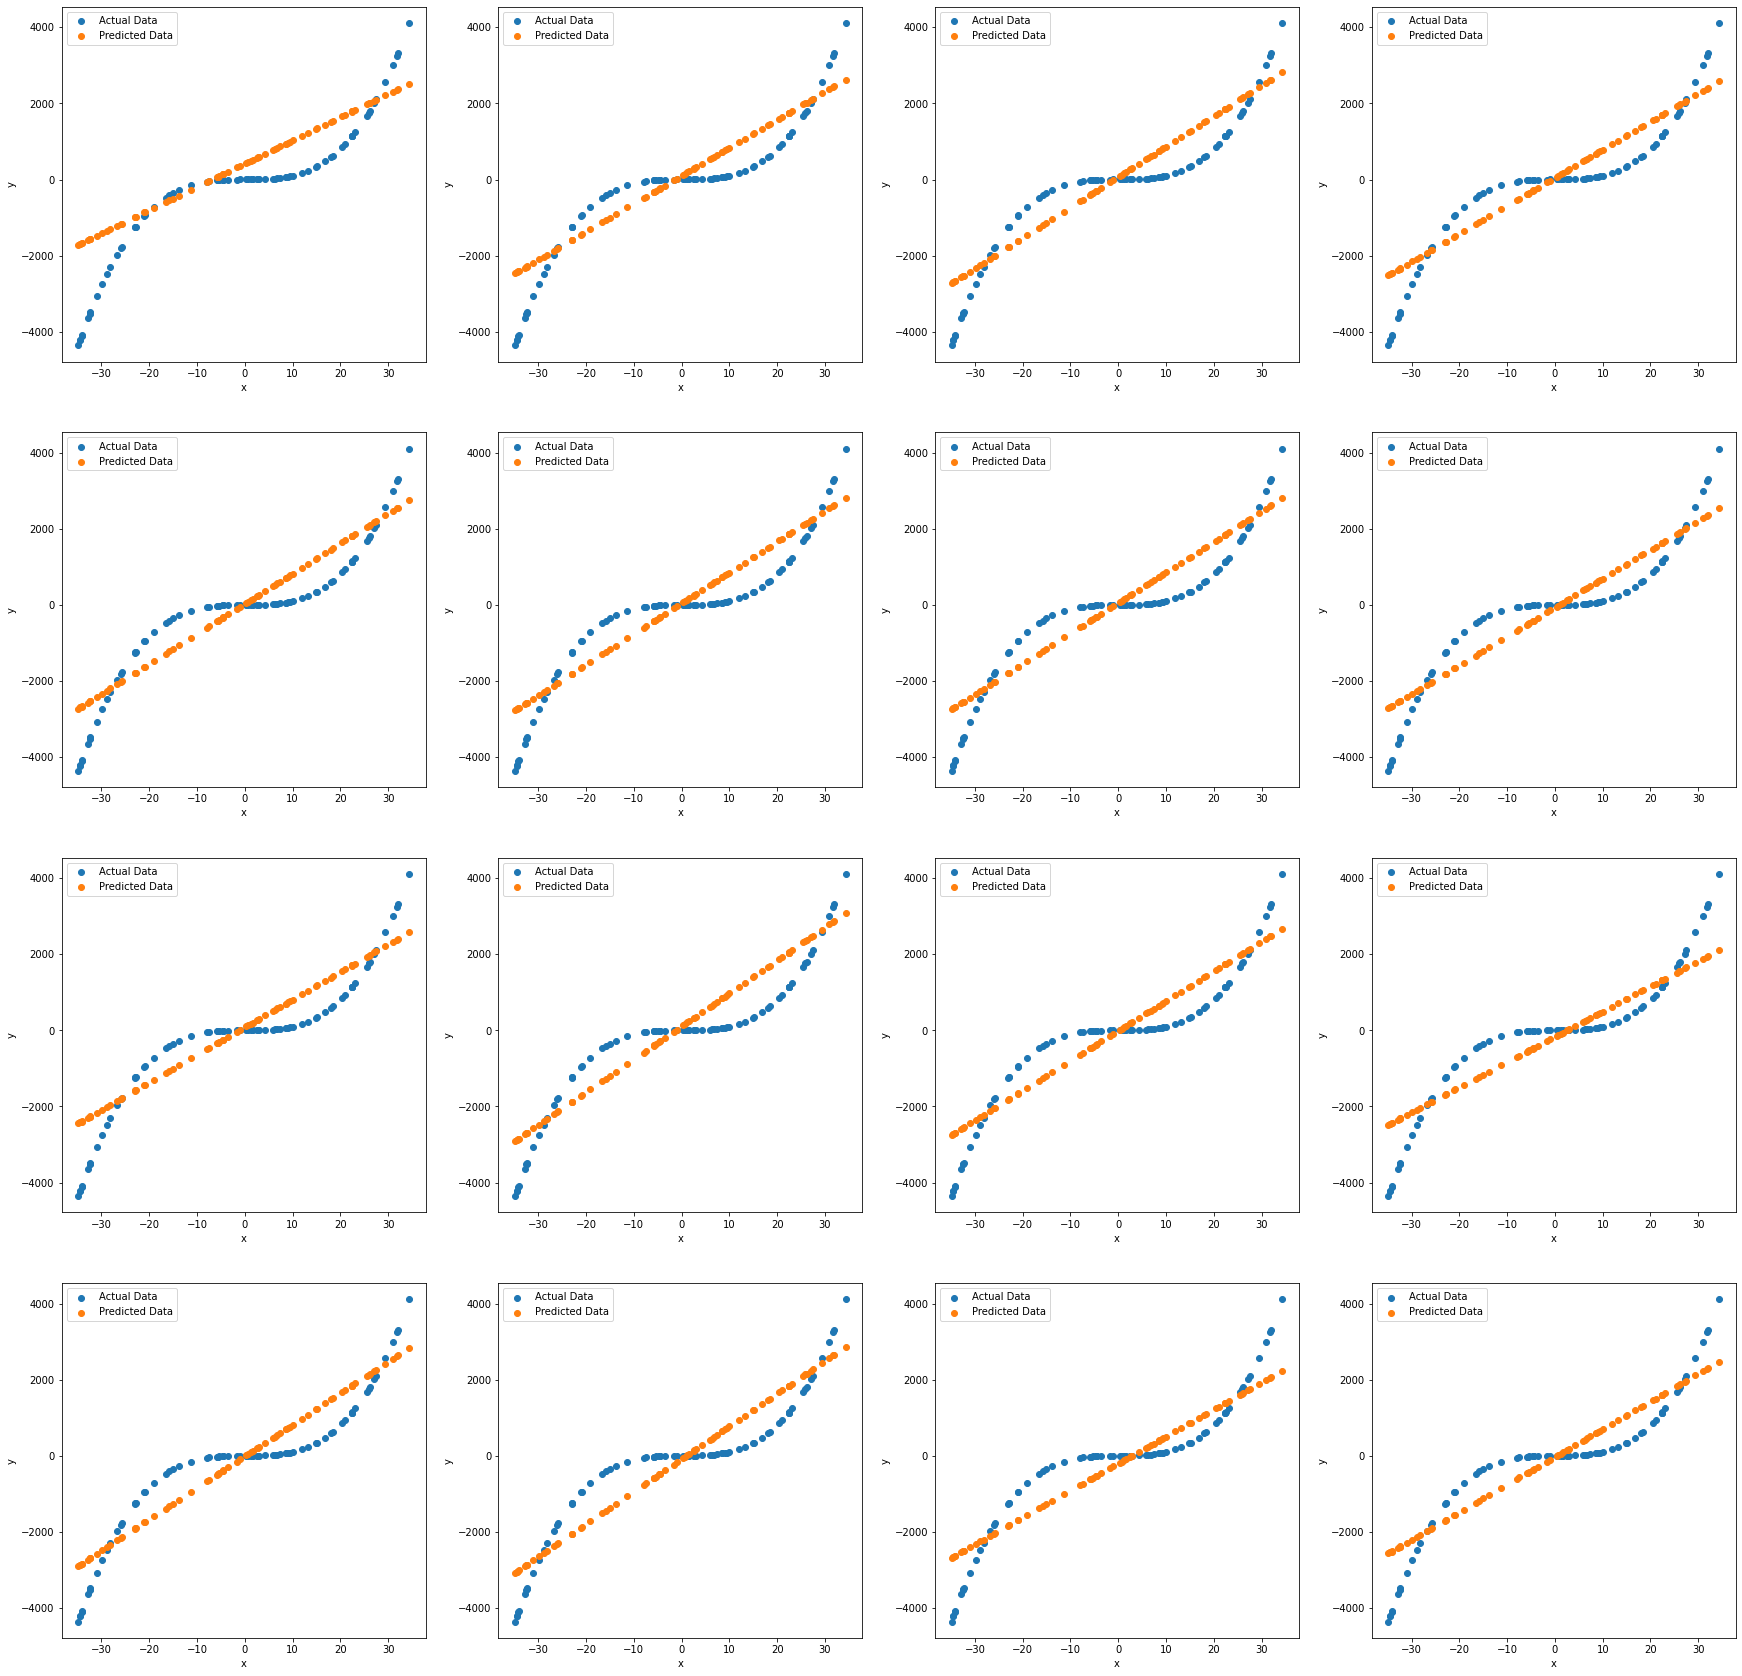

In [78]:
predictedY = []
for i in range (16):
    linearClassifier = LinearRegression().fit(trainX[i], trainY[i])
    prediction = linearClassifier.predict(testX)
    predictedY.append(prediction)
    # plt.plot(testX, predictedY[i], 'o', color = 'red')
    # plt.plot(testX, testY, 'o', color = 'g')
    # plt.show()

# axis = 0 , as to find mean of all the 16 predicted values for any particular x [mean along each column] [used later]
avgY = np.mean(predictedY, axis=0)


fig, axs = plt.subplots(4,4,figsize=(30, 30))

for i in range(1,17):    
    axs.flat[i-1].scatter(testX, testY, label='Actual Data')
    axs.flat[i-1].scatter(testX, predictedY[i-1], label='Predicted Data')
    axs.flat[i-1].set(xlabel='x', ylabel='y')
    axs.flat[i-1].legend()

#### 2: Calculate Bias and variance

In [79]:
# calculate bias and variance for test data and predicted data
# bias2 = (np.array(testY - avgY))**2
# bias2 = np.mean(bias2)

tmse = []


var = []

for y in predictedY:
    var.append(np.mean((y - avgY)**2))
    tmse.append(np.mean((y - testY)**2))

mse = np.mean(tmse)

variance = np.mean(var)

bias = (np.abs(testY - avgY))
bias2 = np.mean(bias**2)
bias = np.mean(bias)

irr = mse - bias2 - variance
# print(irr)
# print(bias2, var)
print(bias, variance)




586.384717599235 37398.04861279225


#### Now do the same for polynomials from deg 2 to 15

In [80]:
# initialising the arrays with degree=1 values

whYmean = []
whYmean.append(avgY)
allpred = []
allpred.append(predictedY)

# print(y_pred)
# print("diff")
# print(predictedY)    
# real y values = testY
# trainX, trainY
# y = mx+c, -> fit/bias/variance
# y = ax^2 + bx + c -> fit/bias/variance   [a,b,c]

for deg in range(2, 16):      # for each degree
    # print(deg)
    tempdegY = []
    for i in range(16):
        trans = PolynomialFeatures(deg)
        x = trans.fit_transform(trainX[i])
        x_t = trans.transform(testX)
        linearClassifier = LinearRegression().fit(x, trainY[i])
        tempdegY.append(linearClassifier.predict(x_t))
    allpred.append(tempdegY)
    whYmean.append(np.mean(tempdegY, axis=0))
    
    


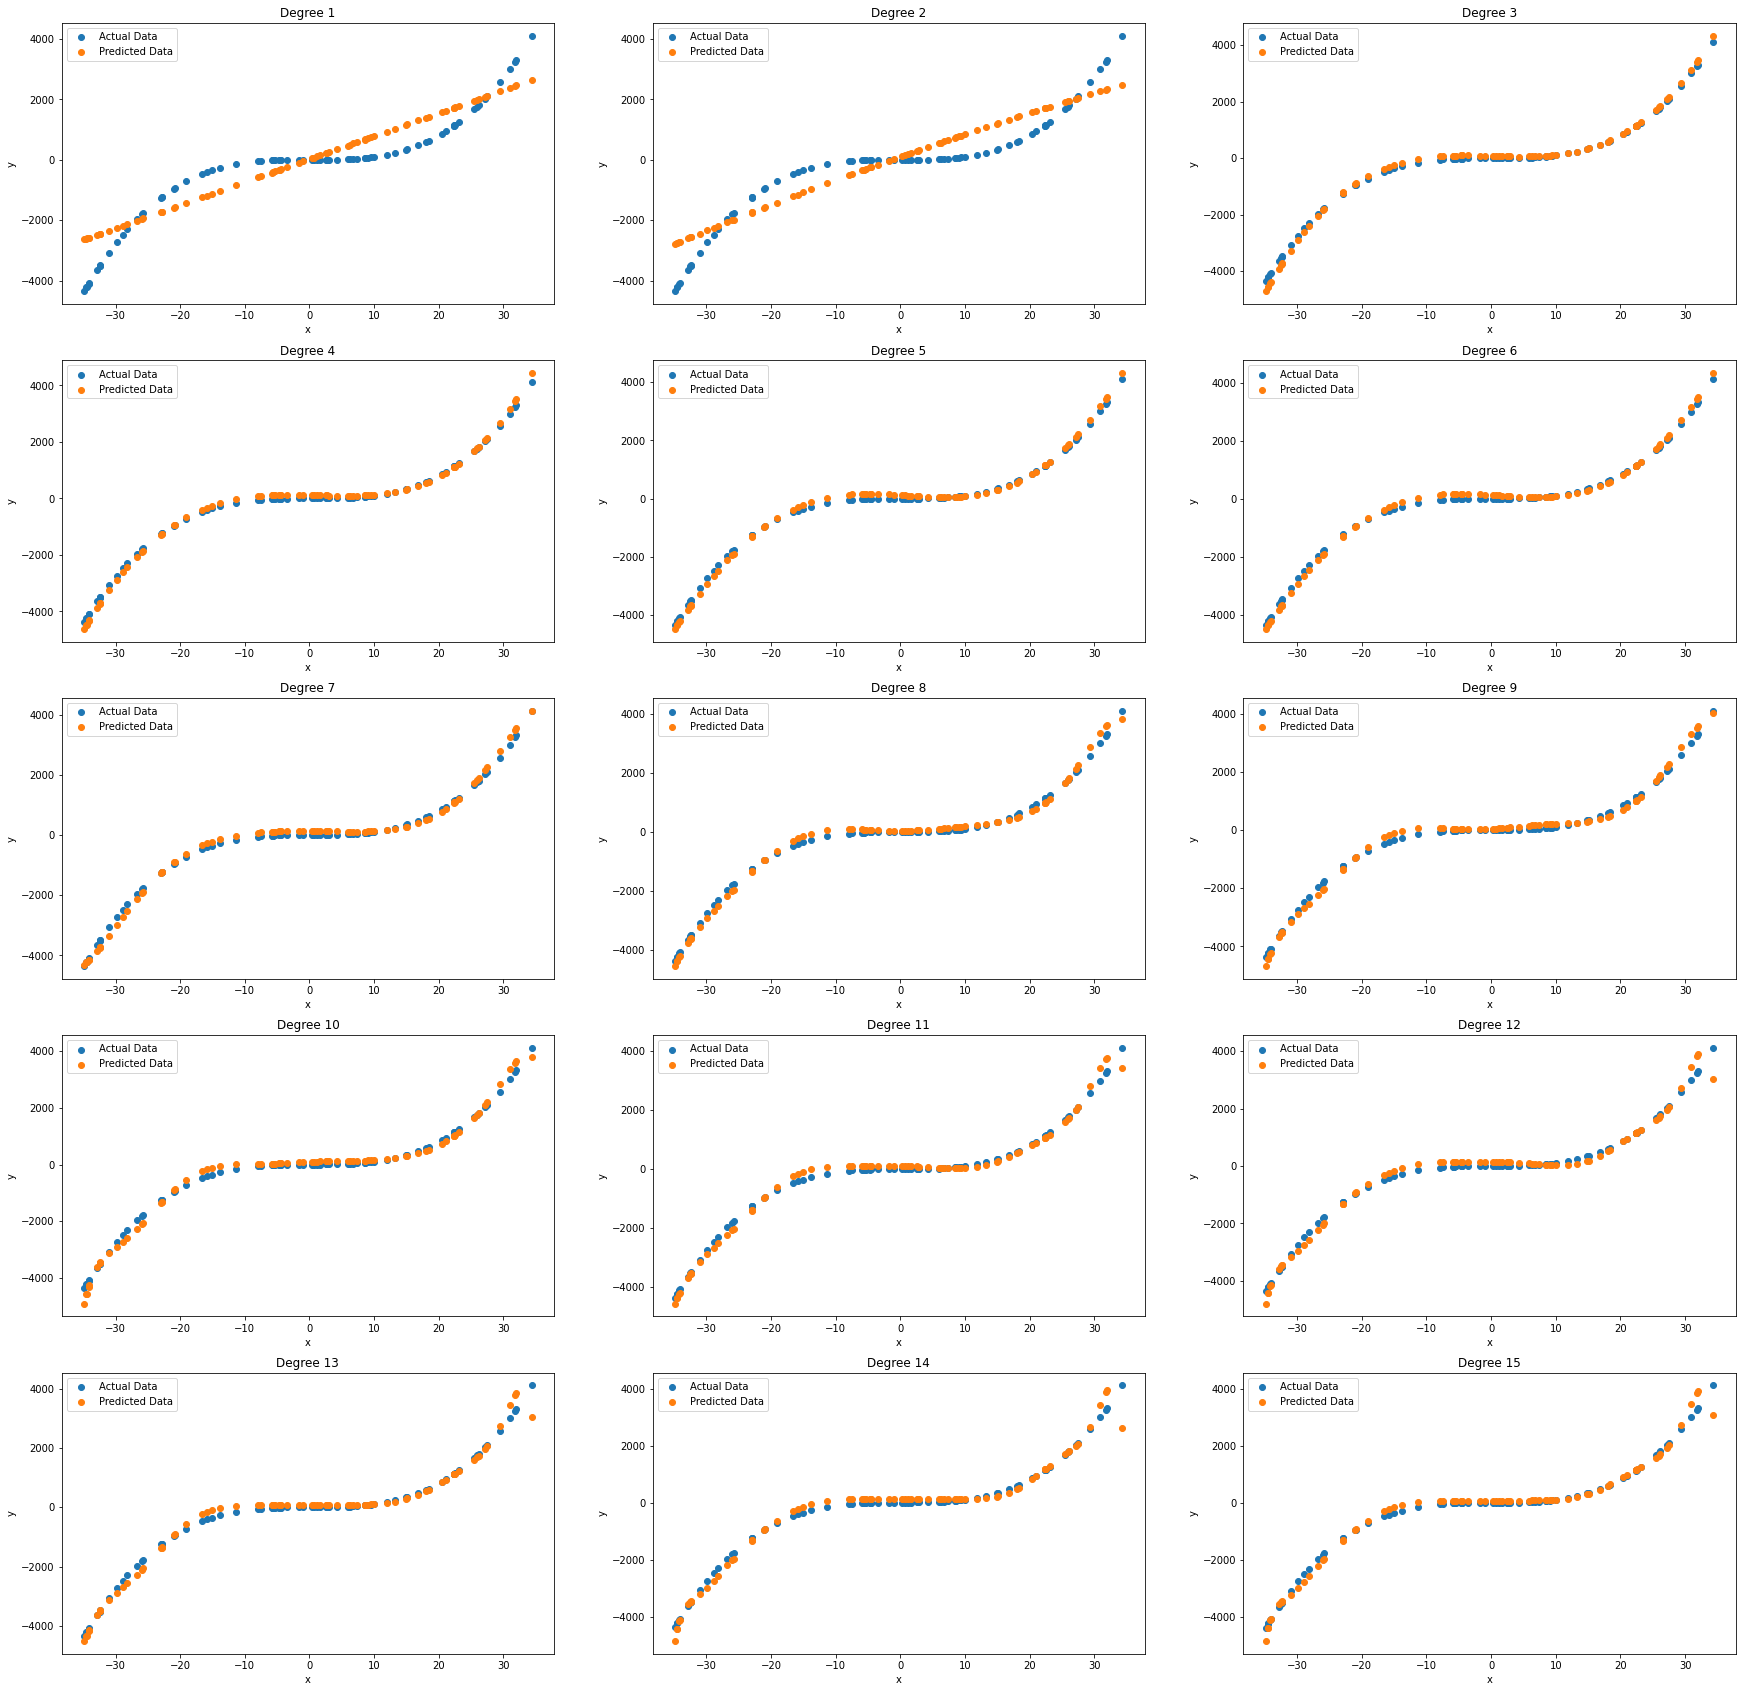

In [81]:
fig, axs = plt.subplots(5,3,figsize=(30, 30))

for degree in range(1,16):    
    axs.flat[degree-1].scatter(testX, testY, label='Actual Data')
    axs.flat[degree-1].scatter(testX, whYmean[degree-1], label='Predicted Data')
    axs.flat[degree-1].set(xlabel='x', ylabel='y')
    axs.flat[degree-1].set_title('Degree ' + str(degree))
    axs.flat[degree-1].legend()



#### Bias, variance tabulation

In [82]:
msePoly = []
msePoly.append(mse)

biasPoly = []
biasPoly.append(bias)

bias2Poly = []
bias2Poly.append(bias2)
variancePoly = []
variancePoly.append(variance)


irrError = []
irrError.append(irr)

for deg in range(2, 16):
    # b = calc_bias2(y_test, y_m[deg-1])
    b = (np.abs(testY - whYmean[deg-1]))
    b2 = np.mean(b**2)
    b = np.mean(b)

    # v = calc_var(y_pred[deg-1], y_m[deg-1])
    ttempmse = []
    tv = []
    for y in allpred[deg-1]:
        tv.append(np.mean(((y - whYmean[deg-1])**2)))
        ttempmse.append(np.mean(((y - testY)**2)))

    tempmse = np.mean(ttempmse)

    v = np.mean(tv) 
    msePoly.append(tempmse)
    biasPoly.append(b)
    bias2Poly.append(b2)
    variancePoly.append(v)

    e = tempmse - b2 - v
    irrError.append(e)
    # print(e)

# print(biasPoly,variancePoly)

# print(irrError)
table = pd.DataFrame({
   
    "bias": biasPoly,
    "variance": variancePoly,
})

table.index = range(1,16)
table.round(4)




,bias,variance
1,586.3847,37398.0486
2,577.7771,54165.0890
3,94.8912,59332.4000
4,101.1262,79796.8965
5,100.7336,94166.6119
6,102.3514,109602.1788
7,110.0861,116030.5539
8,119.7113,140277.6823
9,123.1012,182045.3313
10,130.9879,203317.7737


## TASK 3

to calculate irreducible error e

e = MSE - Bias*2 - Variance


In [83]:

table = pd.DataFrame({
    # "bias": biasPoly,
    # "variance": variancePoly,
    # "mse" : msePoly,
    # "bias2" : bias2Poly,
    "irreducible error": irrError
})

table.index = range(1,16)
table



,irreducible error
1,-8.731149e-11
2,-2.910383e-11
3,0.000000e+00
4,-1.455192e-11
5,0.000000e+00
6,0.000000e+00
7,-2.910383e-11
8,2.910383e-11
9,0.000000e+00
10,-2.910383e-11


## Task 4

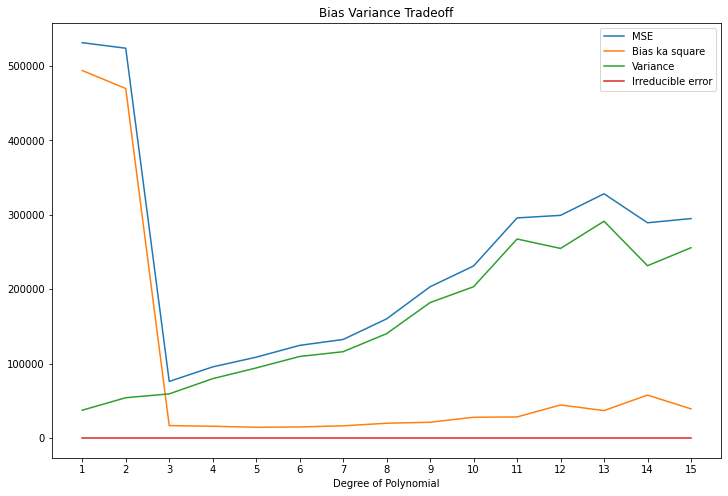

In [84]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,16),msePoly, label='MSE')
plt.plot(range(1,16),bias2Poly,label='Bias ka square')
plt.plot(range(1,16),variancePoly, label='Variance')
plt.plot(range(1,16),irrError, label='Irreducible error')
plt.xlabel("Degree of Polynomial")
plt.title("Bias Variance Tradeoff")
plt.xticks(range(1,16))
plt.legend()